# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet("tracks.parquet")
catalog_names = pd.read_parquet("catalog_names.parquet")
interactions = pd.read_parquet("interactions.parquet")

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [5]:
tracks.sample(5, random_state=42)

,track_id,albums,artists,genres
987231,95229664,[19388714],[222689],[11]
79954,700056,[37164],[118708],"[7, 112, 61]"
567130,39019190,[1806703],[2720477],[12]
500891,34625231,[4271134],[4732313],[68]
55399,518436,"[55672, 55673, 4497446, 4497447, 4497448, 4497...","[29903, 322, 316, 321, 319, 320]",[68]


In [6]:
# Проверяем, что все треки уникальные
tracks['track_id'].nunique()

1000000

In [7]:
# Самое большое значение идентификатора
tracks['track_id'].max()

101521819

In [8]:
# Проверяем пропуски
tracks.isna().sum()

track_id    0
albums      0
artists     0
genres      0
dtype: int64

In [9]:
# Треки с пропущенным жанром
len(tracks[tracks['genres'].str.len() == 0])

3687

In [10]:
# Треки с пропущенным артистом
len(tracks[tracks['artists'].str.len() == 0])

15369

In [11]:
# Треки с пропущенным альбомом
len(tracks[tracks['albums'].str.len() == 0])

18

In [12]:
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [13]:
catalog_names.sample(5, random_state=42)

,id,type,name
1514369,51822590,track,Музыка в фильмах Тарантино
437151,8810199,album,Shadow
1800488,95436616,track,Ключ
635810,19044912,album,Gnomi Di Natale
1436508,43503873,track,Пароль


In [14]:
catalog_names[catalog_names['id'] == 95229664]

,id,type,name
1799702,95229664,track,Have Yourself A Merry Little Christmas


In [15]:
catalog_names[catalog_names['id'] == 19388714]

,id,type,name
639952,19388714,album,Have Yourself A Merry Little Christmas


In [16]:
catalog_names[catalog_names['id'] == 11]

,id,type,name
812316,11,genre,pop


In [17]:
# Типы записей
print(catalog_names['type'].unique())

['album' 'artist' 'genre' 'track']


In [18]:
catalog_names['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [19]:
# Проверяем пропуски
catalog_names.isna().sum()

id      0
type    0
name    0
dtype: int64

In [20]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [21]:
interactions.sample(5, random_state=42)

,user_id,track_id,track_seq,started_at
130,844258,3581309,131,2022-06-05
433,1091434,14937363,434,2022-06-29
526,73981,48591660,527,2022-09-26
9,78605,732405,10,2022-09-14
1202,1273064,40339506,1203,2022-08-24


In [22]:
# История прослушиваний одного юзера
interactions[interactions['user_id'] == 844258]

,user_id,track_id,track_seq,started_at
0,844258,9610,1,2022-05-19
1,844258,12080,2,2022-05-19
2,844258,34608,3,2022-05-19
3,844258,37475,4,2022-05-19
4,844258,47680,5,2022-05-19
...,...,...,...,...
1200,844258,98123699,1201,2022-11-06
1201,844258,99779643,1202,2022-11-06
1202,844258,99911813,1203,2022-11-06
1203,844258,100215030,1204,2022-11-06


In [23]:
interactions.describe()

,user_id,track_id,track_seq,started_at
count,2.226299e+08,2.226299e+08,2.226299e+08,222629898
mean,6.875767e+05,3.653622e+07,4.621403e+02,2022-08-29 16:39:44.541336320
min,0.000000e+00,2.600000e+01,1.000000e+00,2022-01-01 00:00:00
25%,3.433710e+05,1.480849e+07,5.600000e+01,2022-07-02 00:00:00
50%,6.879730e+05,3.552474e+07,1.810000e+02,2022-09-15 00:00:00
75%,1.031127e+06,5.651137e+07,5.060000e+02,2022-11-09 00:00:00
max,1.374582e+06,1.015218e+08,1.663700e+04,2022-12-31 00:00:00
std,3.969033e+05,2.661782e+07,8.257312e+02,NaN


In [24]:
# Проверяем пропуски
interactions.isna().sum()

user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64

In [25]:
# Количество взаимодействий
len(interactions)

222629898

In [26]:
# Количество уникальных пользователей
interactions['user_id'].nunique()

1373221

In [27]:
interactions.groupby(['user_id']).size()

user_id
0           26
1           36
2           14
3           33
4          256
          ... 
1374578     11
1374579     24
1374580    277
1374581    503
1374582    292
Length: 1373221, dtype: int64

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

In [28]:
# В таблице треков есть элементы с пропущенными значениями жанров/альбомов/артистов.
# track_id можно проиндексировать более экономно (сейчас номера id на порядок превышают количество треков).

In [29]:
# Для удобства можно преобразовать данные жанров/альбомов/артистов в таблице tracks в категориальные переменные
# или новые строки.

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

Text(0.5, 1.0, 'Количество взаимодействий с треками')

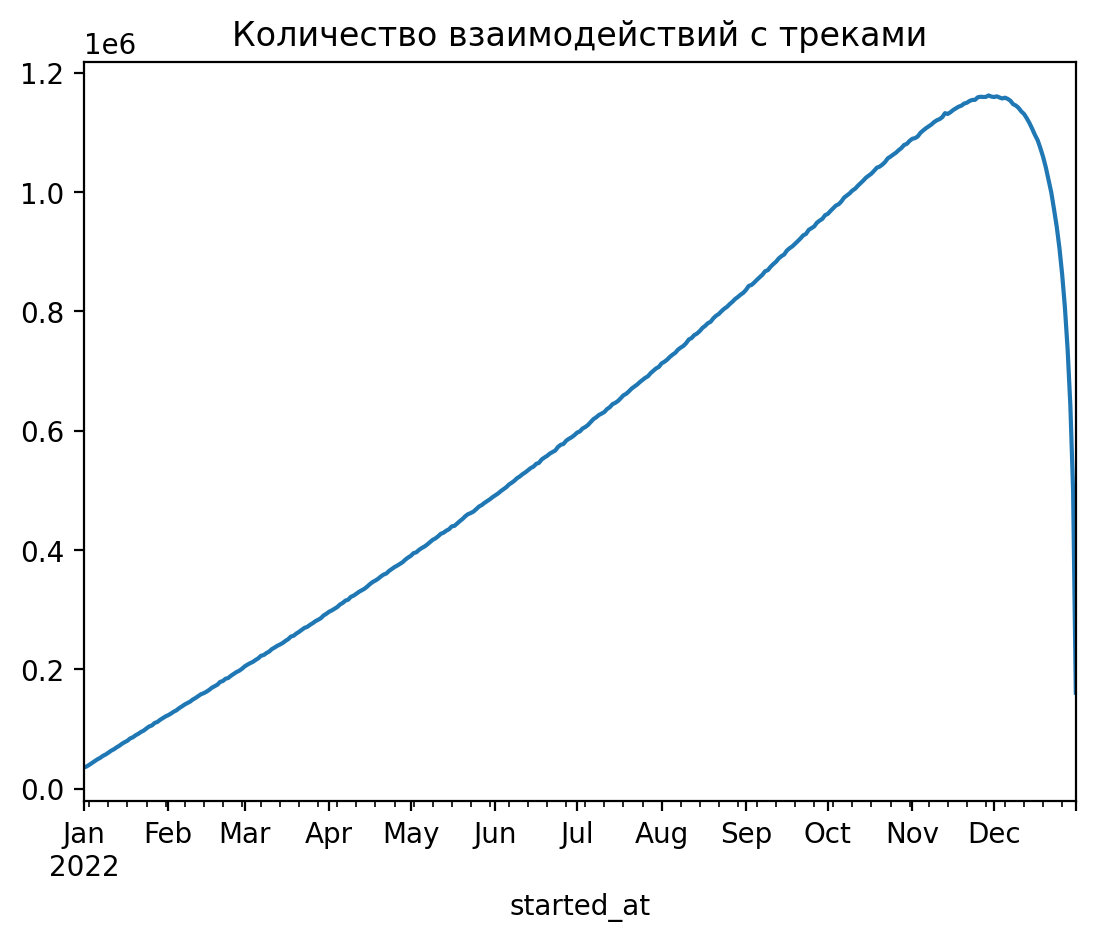

In [30]:
# Распределение книг по годам публикации

fig, ax = plt.subplots()

interactions["started_at"].value_counts().sort_index().plot(ax=ax)

ax.set_title("Количество взаимодействий с треками")

In [31]:
from pandas.tseries.offsets import MonthEnd

In [32]:
interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [33]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), tracks=("track_id", "nunique")).reset_index()

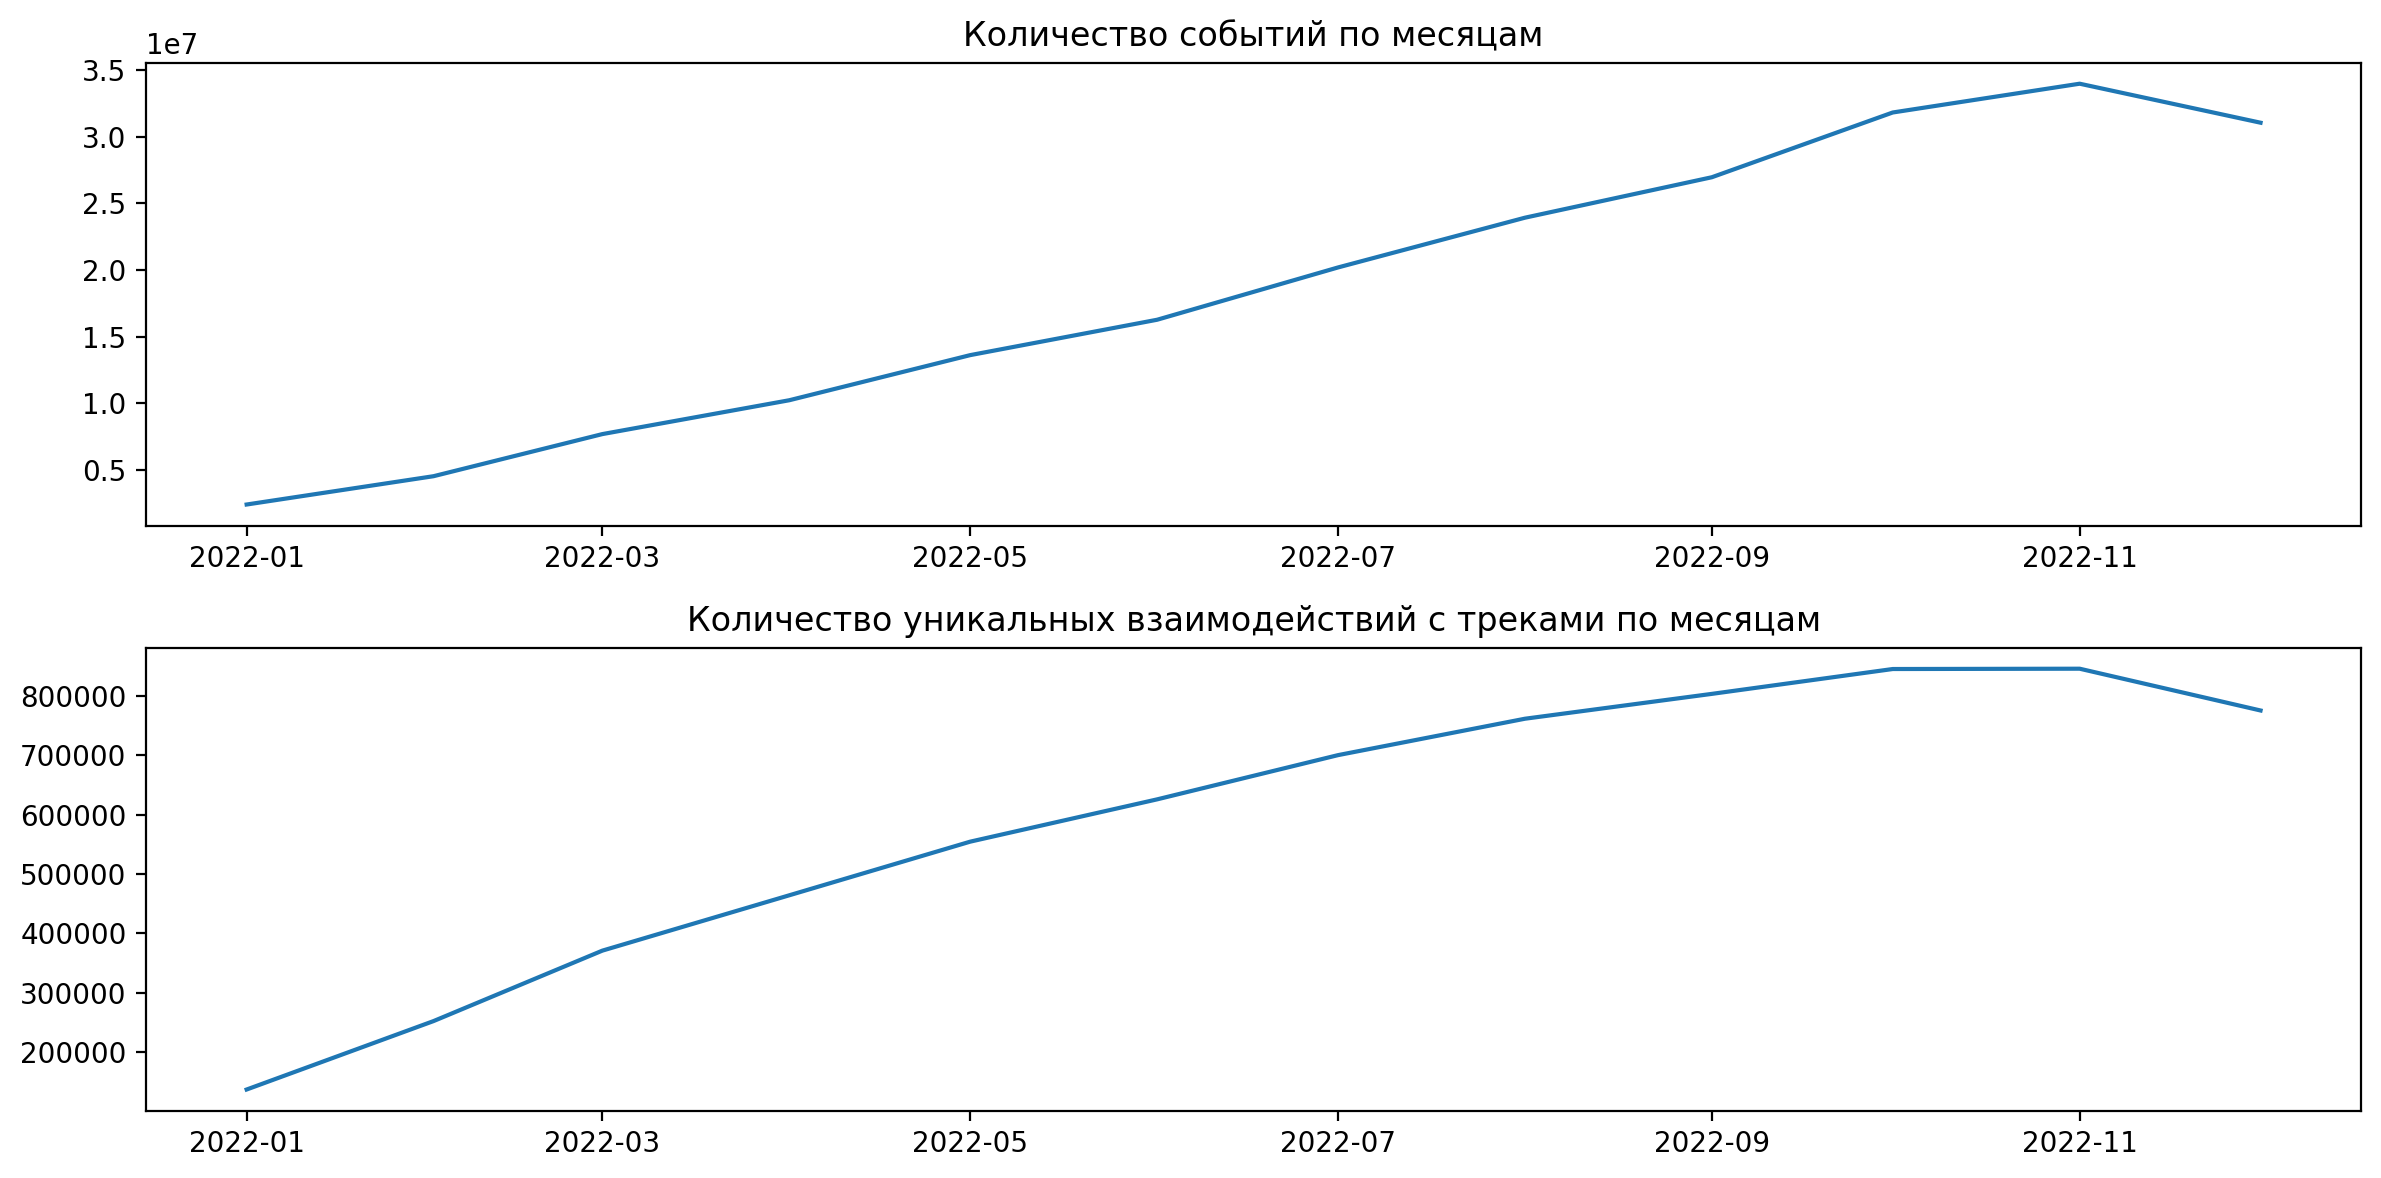

In [34]:
# Распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
ax.set_title("Количество событий по месяцам")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["tracks"])
ax.set_title("Количество уникальных взаимодействий с треками по месяцам")

fig.tight_layout()

Наиболее популярные треки

In [35]:
top_items = pd.DataFrame(interactions['track_id'].value_counts()) \
    .join(catalog_names.set_index('id')) \
    .sort_values('count', ascending=False)

In [36]:
top_items[top_items['type'] == 'track'].head(10)

,count,type,name
track_id,,,
53404,111062,track,Smells Like Teen Spirit
33311009,106921,track,Believer
178529,101924,track,Numb
35505245,99490,track,I Got Love
65851540,86670,track,Юность
24692821,86246,track,Way Down We Go
32947997,85886,track,Shape of You
51241318,85244,track,In The End
795836,85042,track,Shape Of My Heart


Наиболее популярные жанры

In [37]:
genres_counts = top_items.join(tracks.set_index("track_id")).explode('genres')['genres'].value_counts()

In [38]:
top_genres = pd.DataFrame(genres_counts).join(catalog_names[catalog_names['type'] == 'genre'].set_index('id')['name'])
top_genres.head(10)

,count,name
genres,,
11,171768,pop
75,129815,rap
102,124214,allrock
68,115864,electronics
47,74998,metal
3,66175,rusrap
44,61144,foreignrap
14,59098,rock
16,52167,dance


Треки, которые никто не прослушал

In [39]:
tracks[~tracks['track_id'].isin(interactions['track_id'])]

,track_id,albums,artists,genres


In [40]:
# Число уникальных треков в таблице треков и таблице взаимодействиями совпадает.
# Поэтому все треки были послушаны.
interactions['track_id'].nunique()

1000000

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [41]:
# Оставляем только пользователей, которые слушали больше одного трека
atleast_two_interactions = interactions[['user_id']].groupby('user_id').size().to_frame('size')
atleast_two_interactions = atleast_two_interactions[atleast_two_interactions['size'] >= 2]

In [42]:
len(atleast_two_interactions)

1372372

In [43]:
interactions = interactions[interactions['user_id'].isin(atleast_two_interactions.index)]

In [44]:
# В данных присутствуют треки без жанров/альбомов/артистов. Удаляем их из tracks и events
no_genres_track_ids = set(tracks[tracks['genres'].str.len() == 0]['track_id'].values)
no_albums_track_ids = set(tracks[tracks['albums'].str.len() == 0]['track_id'].values)
no_artists_track_ids = set(tracks[tracks['artists'].str.len() == 0]['track_id'].values)

In [45]:
print('Количество треков без жанров:', len(no_genres_track_ids))
print('Количество треков без альбомов:', len(no_albums_track_ids))
print('Количество треков без исполнителей:', len(no_artists_track_ids))

Количество треков без жанров: 3687
Количество треков без альбомов: 18
Количество треков без исполнителей: 15369


In [46]:
track_ids_to_delete = no_genres_track_ids.union(no_albums_track_ids).union(no_artists_track_ids)

In [47]:
len(track_ids_to_delete)

19023

In [48]:
# Заметим что три множества практически не пересекаются

In [49]:
interactions = interactions[~interactions['track_id'].isin(no_genres_track_ids)]

In [50]:
tracks = tracks[~tracks['track_id'].isin(no_genres_track_ids)]

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [51]:
tracks.to_parquet("items.parquet")
interactions.to_parquet("events.parquet")

In [52]:
import boto3
import pandas as pd
from io import BytesIO
import os
from dotenv import load_dotenv

In [53]:
load_dotenv()

True

In [54]:
aws_access_key_id = os.getenv('AWS_ACCESS_KEY_ID_STUDENT')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY_STUDENT')
bucket_name = os.getenv('STUDENT_S3_BUCKET')

s3_client = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)

In [55]:
# s3_client.list_buckets()

In [56]:
# aws_path = 'recsys/data/'

In [57]:
# def upload_to_s3(df, bucket, path):
#     buffer = BytesIO()
#     df.to_parquet(buffer, index=False)
#     buffer.seek(0)
#     s3_client.upload_fileobj(buffer, bucket, path)

# upload_to_s3(tracks, bucket_name, f'{aws_path}items.parquet')
# upload_to_s3(interactions, bucket_name, f'{aws_path}events.parquet')

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [58]:
del tracks
del interactions

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [59]:
items = pd.read_parquet("items.parquet")
events = pd.read_parquet("events.parquet")

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [64]:
# зададим точку разбиения
train_test_global_time_split_date = pd.Timestamp("2022-12-16")

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

In [65]:
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

print('Количество пользователей в train', len(users_train))
print('Количество пользователей в test', len(users_test))

Количество пользователей в train 1341725
Количество пользователей в test 783212


# Топ популярных

Рассчитаем рекомендации как топ популярных.

# Персональные

Рассчитаем персональные рекомендации.

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.